In [1]:
import torch
import torch.nn as nn


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        """
        input shape: (batch_size, 1, 28, 28)
        conv1: (1, 28, 28) -> (6, 24, 24) -> (6, 12, 12)
        """
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        """
        input shape: (batch_size, 6, 12, 12)
        conv2: (6, 12, 12) -> (16, 8, 8) -> (16, 4, 4)
        """
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        """
        input shape: (batch_size, 16, 4, 4)
        fc1: (16, 4, 4) -> (120,)
        """
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 4 * 4, 120),
            nn.ReLU()
        )

        """
        input shape: (batch_size, 120)
        fc2: (120,) -> (84,)
        """
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )

        """
        input shape: (batch_size, 84)
        fc3: (84,) -> (10,)
        """
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        """
        input shape: (batch_size, 1, 28, 28)
        """
        x = x.view(-1, 1, 28, 28)

        """
        input shape: (batch_size, 1, 28, 28)
        conv1: (1, 28, 28) -> (6, 24, 24) -> (6, 12, 12)
        """
        x = self.conv1(x)

        """
        input shape: (batch_size, 6, 12, 12)
        conv2: (6, 12, 12) -> (16, 8, 8) -> (16, 4, 4)
        """
        x = self.conv2(x)

        """
        flatten
        input shape: (batch_size, 16, 4, 4)
        output shape: (batch_size, 16*4*4)
        """
        x = x.view(x.size(0), -1)

        """
        input shape: (batch_size, 16*4*4)
        fc1: (16*4*4) -> (120,)
        """
        x = self.fc1(x)

        """
        input shape: (batch_size, 120)
        fc2: (120,) -> (84,)
        """
        x = self.fc2(x)

        """
        input shape: (batch_size, 84)
        fc3: (84,) -> (10,)
        """
        output = self.fc3(x)

        return output

    def predict(self, x):
        with torch.no_grad():
            output = self.forward(x)
            prob = torch.softmax(output, dim=1)
            prob_list = prob.squeeze().tolist()
            prob, index = torch.max(prob, 1)
        return index, prob, prob_list


def print_params(model):
    count = 0
    for name, param in model.named_parameters():
        count += param.numel()
        print(name, param.shape)
    print('total parameters:', count)


def print_forward(model, x):
    print('input x to model:', x.shape)
    for name, layer in model.named_children():
        if name == 'fc1':
            x = x.view(x.shape[0], -1)
        x = layer(x)
        print(f'{name} after size: {x.shape}')


test_model = LeNet()
print(test_model)
print('---')
print_params(test_model)

x = torch.randn(64, 1, 28, 28)
print_forward(test_model, x)

LeNet(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
  )
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
---
conv1.0.weight torch.Size([6, 1, 5, 5])
conv1.0.bias torch.Size([6])
conv2.0.weight torch.Size([16, 6, 5, 5])
conv2.0.bias torch.Size([16])
fc1.0.weight torch.Size([120, 256])
fc1.0.bias torch.Size([120])
fc2.0.weight torch.Size([84, 120])
fc2.0.bias torch.Size([84])
fc3.weight torch.Size([10, 84])
fc3.bias torch.Size([10])
total parameters: 44426
inp

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import random

# 设置全局随机种子
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)


def worker_init_fn(worker_id):
    np.random.seed(seed + worker_id)
    random.seed(seed + worker_id)


transform = transforms.Compose([
    transforms.RandomRotation(12),  # 随机旋转 12 度
    transforms.ToTensor(),
])

# 加载训练数据集
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)


# 定义训练数据加载器
train_loader = DataLoader(
    dataset=train_dataset, batch_size=64, shuffle=True, worker_init_fn=worker_init_fn)


# 加载测试数据集
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(
    dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:37<00:00, 261305.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 116849.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 861570.01it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1844015.95it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
learning_rate = 0.001
model = LeNet()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()


def calculate_test_performance(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item() * len(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)
    return test_loss, accuracy

In [12]:
import wandb
wandb.require("core")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion.to(device)

total = len(train_loader.dataset)  # type: ignore
epochs = 25

wandb_init_args = {
    'project': 'MNIST-手写数字识别',
    'config': {
        "learning_rate": learning_rate,
        "architecture": "LeNet-5",
        "dataset": "MNIST",
        "epochs": epochs,
    },
    'reinit': True
}
run = wandb.init(**wandb_init_args, job_type="training")
wandb_init_args['name'] = run.name

for epoch in range(epochs):
    train_loss = 0.0
    train_correct = 0.0

    for i, (images, labels) in enumerate(train_loader):
        model.train()
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item() * images.size(0)
        loss.backward()
        optimizer.step()
        train_correct += (outputs.argmax(1) == labels).sum().item()

        if (i + 1) % 100 == 0:
            print(
                f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    test_loss, test_accuracy = calculate_test_performance(
        model, test_loader, criterion)
    wandb.log({
        "train_loss": train_loss / total,
        "test_loss": test_loss,
        "train_accuracy": train_correct / total,
        "test_accuracy": test_accuracy
    })


wandb.finish()

Epoch [1/10], Step [100/938], Loss: 0.3133
Epoch [1/10], Step [200/938], Loss: 0.1929
Epoch [1/10], Step [300/938], Loss: 0.3780
Epoch [1/10], Step [400/938], Loss: 0.2173
Epoch [1/10], Step [500/938], Loss: 0.1584
Epoch [1/10], Step [600/938], Loss: 0.0541
Epoch [1/10], Step [700/938], Loss: 0.1795
Epoch [1/10], Step [800/938], Loss: 0.2038
Epoch [1/10], Step [900/938], Loss: 0.0446
Epoch [2/10], Step [100/938], Loss: 0.0786
Epoch [2/10], Step [200/938], Loss: 0.0610
Epoch [2/10], Step [300/938], Loss: 0.1948
Epoch [2/10], Step [400/938], Loss: 0.1099
Epoch [2/10], Step [500/938], Loss: 0.0588
Epoch [2/10], Step [600/938], Loss: 0.1006
Epoch [2/10], Step [700/938], Loss: 0.0563
Epoch [2/10], Step [800/938], Loss: 0.1009
Epoch [2/10], Step [900/938], Loss: 0.1376
Epoch [3/10], Step [100/938], Loss: 0.0234
Epoch [3/10], Step [200/938], Loss: 0.1687
Epoch [3/10], Step [300/938], Loss: 0.0203
Epoch [3/10], Step [400/938], Loss: 0.0308
Epoch [3/10], Step [500/938], Loss: 0.1436
Epoch [3/10

epoch,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇██
test_accuracy,▁▅▆▆▇████▇
test_loss,█▄▃▂▁▁▁▁▁▂
train_accuracy,▁▆▇▇██████
train_loss,█▃▂▂▂▁▁▁▁▁
epoch,9
test_accuracy,0.9881
test_loss,0.03736
train_accuracy,0.98922
train_loss,0.03193


In [16]:
model = LeNet()
model.load_state_dict(torch.load(
    './model.pth', map_location=torch.device('cpu')))

/var/folders/4d/14nkpqsn4zs8c1dmkl0p4mxr0000gp/T/ipykernel_65232/703398484.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(


<All keys matched successfully>

{0: 2, 1: 4, 2: 4, 3: 9, 4: 13, 5: 10, 6: 12, 7: 15, 8: 6, 9: 12}
error-count: 87
Accuracy of the network on the 10000 test images: 99.13%


<BarContainer object of 10 artists>

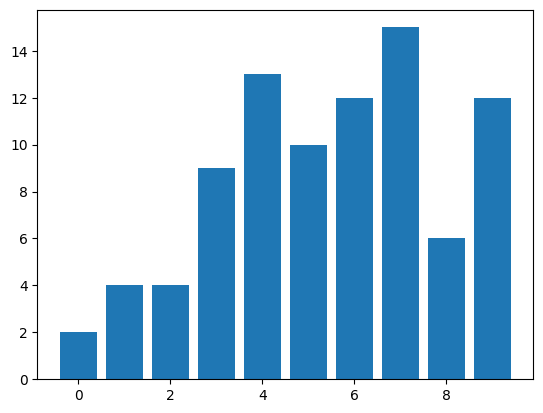

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint


# 加载测试数据集
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(
    dataset=test_dataset, batch_size=64, shuffle=False)

# 测试模型
model.eval()  # 切换到评估模式
with torch.no_grad():
    """ 统计每个数字的错误次数 """
    error_count_dict = {
        0: 0,
        1: 0,
        2: 0,
        3: 0,
        4: 0,
        5: 0,
        6: 0,
        7: 0,
        8: 0,
        9: 0
    }
    test_loss = 0.0
    correct = 0
    total = 0

    for batch_index, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        error_index = np.where((predicted == labels).cpu().numpy() == False)[0]
        for index in error_index:
            error_count_dict[labels[index].item()] += 1

test_loss /= total
test_accuracy = correct / total

pprint(error_count_dict)
print('error-count:', sum(error_count_dict.values()))
print('Accuracy of the network on the 10000 test images: {:.2f}%'.format(
    100 * test_accuracy))

# 将每个数字的错误次数绘制为柱状图
plt.bar(error_count_dict.keys(), error_count_dict.values())

In [15]:
# 保存后加载模型
torch.save(model.state_dict(), './model.pth')

# model = Net()
# model.load_state_dict(torch.load('./server/model.pth'))

# # 创建一个示例输入张量（假设输入尺寸是 [1, 784]）
# dummy_input = torch.randn(1, 28 * 28)

# # 导出模型到 ONNX 格式
# torch.onnx.export(
#     model,                # 要转换的模型
#     dummy_input,          # 示例输入张量
#     "model.onnx",         # 导出的 ONNX 文件名
#     input_names=['input'],  # 输入张量的名称
#     output_names=['output'],  # 输出张量的名称
#     opset_version=11      # ONNX opset 版本，通常使用最新版本（这里使用 11）
# )

In [22]:
for name, param in model.named_parameters():
    print(name, param.shape)
    print(param)

conv1.weight torch.Size([6, 1, 5, 5])
Parameter containing:
tensor([[[[-0.0835, -0.1147,  0.1766, -0.2374, -0.3184],
          [ 0.2185, -0.0712,  0.3234, -0.1315, -0.4185],
          [ 0.0095,  0.0825,  0.3548,  0.1549, -0.4919],
          [-0.1100,  0.1137,  0.3204,  0.2863,  0.1132],
          [-0.3496, -0.0276,  0.1008,  0.2028,  0.1251]]],


        [[[-0.0621,  0.1024, -0.4355, -0.3109, -0.3119],
          [-0.0978, -0.3006, -0.1599, -0.2412, -0.0855],
          [ 0.0588, -0.1527,  0.1515,  0.0362,  0.0635],
          [ 0.3056,  0.2454,  0.3532,  0.5081,  0.3636],
          [-0.0525,  0.1815, -0.0728, -0.1059,  0.0304]]],


        [[[ 0.0142,  0.1986,  0.1604,  0.4141,  0.1842],
          [ 0.0671,  0.0861,  0.2015,  0.1312,  0.5027],
          [-0.2690, -0.1346,  0.1009, -0.1540,  0.0628],
          [ 0.0016, -0.0773, -0.3285, -0.2970, -0.3599],
          [-0.1304, -0.0544, -0.2001, -0.1619, -0.1192]]],


        [[[ 0.1370,  0.3224,  0.1260,  0.0338, -0.1960],
          [ 0.30